# Quelques méthodes d'apprentissage sur des données issues d'un recensement


### Chargement des données

In [4]:
import pandas as pd # librairie de gestion de bases de données comme des dataframes 
import seaborn as sns # librairie de visualisation
import sklearn # libraire scikit-learn 
import matplotlib.pyplot as plt 
import numpy as np 

censusData = pd.read_csv("census.csv",na_values="?")

Les données sont chargées, en indiquant que les ? sont des valeurs manquantes. Affichons les. 

In [5]:
censusData.head(10)

,age,workclass,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,income
0,54,Private,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,<=50K
1,41,Private,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,<=50K
2,38,Private,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,<=50K
3,38,Self-emp-not-inc,15,Never-married,Prof-specialty,Not-in-family,White,Male,0,2824,45,>50K
4,52,Private,13,Widowed,Other-service,Not-in-family,White,Female,0,2824,20,>50K
5,51,NaN,16,Never-married,NaN,Not-in-family,White,Male,0,2824,40,>50K
6,46,Private,15,Divorced,Prof-specialty,Not-in-family,White,Male,0,2824,40,>50K
7,45,Private,7,Divorced,Transport-moving,Not-in-family,White,Male,0,2824,76,>50K
8,29,Private,7,Separated,Sales,Not-in-family,White,Female,0,2754,42,<=50K
9,61,NaN,9,Married-civ-spouse,NaN,Husband,White,Male,0,2603,32,<=50K


In [6]:
censusData.shape

(20000, 12)

Enlevons les valeurs manquantes à l'aide de la commande dropna()

In [7]:
censusData=censusData.dropna()
censusData.head(10)

,age,workclass,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,income
0,54,Private,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,<=50K
1,41,Private,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,<=50K
2,38,Private,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,<=50K
3,38,Self-emp-not-inc,15,Never-married,Prof-specialty,Not-in-family,White,Male,0,2824,45,>50K
4,52,Private,13,Widowed,Other-service,Not-in-family,White,Female,0,2824,20,>50K
6,46,Private,15,Divorced,Prof-specialty,Not-in-family,White,Male,0,2824,40,>50K
7,45,Private,7,Divorced,Transport-moving,Not-in-family,White,Male,0,2824,76,>50K
8,29,Private,7,Separated,Sales,Not-in-family,White,Female,0,2754,42,<=50K
10,33,Private,2,Married-civ-spouse,Craft-repair,Not-in-family,White,Male,0,2603,32,<=50K
11,49,Private,3,Married-civ-spouse,Other-service,Husband,White,Male,0,2603,40,<=50K


L'objectif est de prédire la variable "income" (Y) à partir des autres variables explicatives (X)

### Création d'un échantillon de test et d'un échantillon d'apprentissage

On commence par séparer les données en une base d'apprentissage ($\mathcal{D}_n$) à partir de laquelle on veut construire un classifieur. Ce classifieur sera ensuite évalué sur la base de test, où l'on pourra comparer la qualité des prédictions effectuées avec la vraie valeur de la variable à prédire.

In [9]:
from sklearn.model_selection import train_test_split

censusTrain, censusTest = train_test_split(censusData, test_size=0.2)
print("la taille de la base d'apprentissage est",censusTrain.shape)
print("la taille de la base de test est",censusTest.shape)


la taille de la base d'apprentissage est (15109, 12)
la taille de la base de test est (3778, 12)


# Visualisations à partir de la base d'apprentissage

Quelques visualisations simples permettent de se rendre compte des variables qui influencent la variable income : le niveau d'éducation et l'age notamment, ou encore le temps passé au travail.

### Visualisation d'une variable explicative


 income levels
 <=50K    11334
>50K      3775
Name: income, dtype: int64

 workclass levels
 Private             11108
Self-emp-not-inc     1247
Local-gov            1048
State-gov             644
Self-emp-inc          560
Federal-gov           496
Without-pay             6
Name: workclass, dtype: int64

 occupations levels
 Craft-repair         2047
Prof-specialty       2025
Exec-managerial      1980
Adm-clerical         1853
Sales                1757
Other-service        1610
Machine-op-inspct     999
Transport-moving      792
Handlers-cleaners     682
Farming-fishing       492
Tech-support          464
Protective-serv       327
Priv-house-serv        74
Armed-Forces            7
Name: occupation, dtype: int64


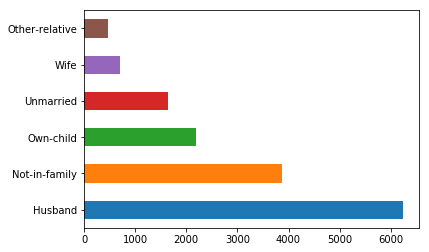

In [10]:
# How to look at a particular categorial variable 

print("\n income levels\n",censusTrain.income.value_counts())
print("\n workclass levels\n",censusTrain.workclass.value_counts())
print("\n occupations levels\n",censusTrain['occupation'].value_counts())

tab = censusTrain.relationship.value_counts()
tab.plot(kind='barh')


### Visualisation de la dépendance entre une variable explicative et la variable à prédire

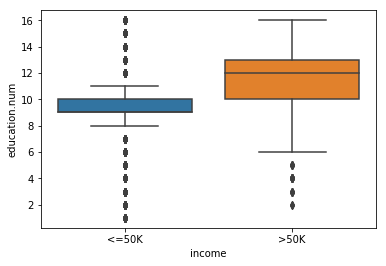

In [11]:
#sns.boxplot(x=censusTrain["education.num"])
sns.boxplot(x=censusTrain["income"],y=censusTrain["education.num"])

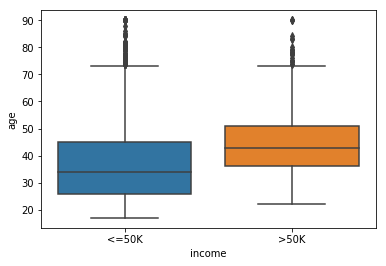

In [12]:
sns.boxplot(x=censusTrain["income"],y=censusTrain["age"])

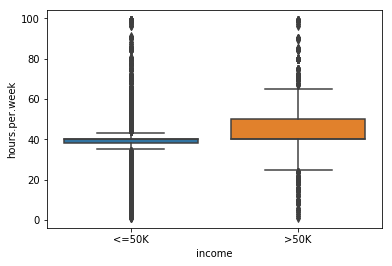

In [13]:
sns.boxplot(x=censusTrain["income"],y=censusTrain["hours.per.week"])

### Visualisation d'une paire de variables explicatives continues et de la variable à prédire

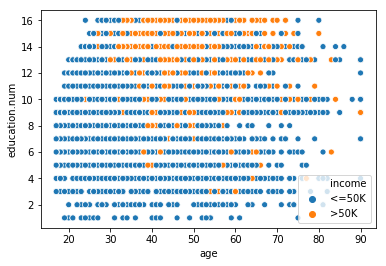

In [14]:
# requires version 0.9.0 of seaborn !
sns.scatterplot(x=censusTrain["age"],y=censusTrain["education.num"],hue=censusTrain["income"])
# requires pandas v.0.23.4 cannot color yet !
# censusTrain.plot.scatter(x="age",y="education.num")

### Visualisation de toutes les paires de variables continues simultanément 

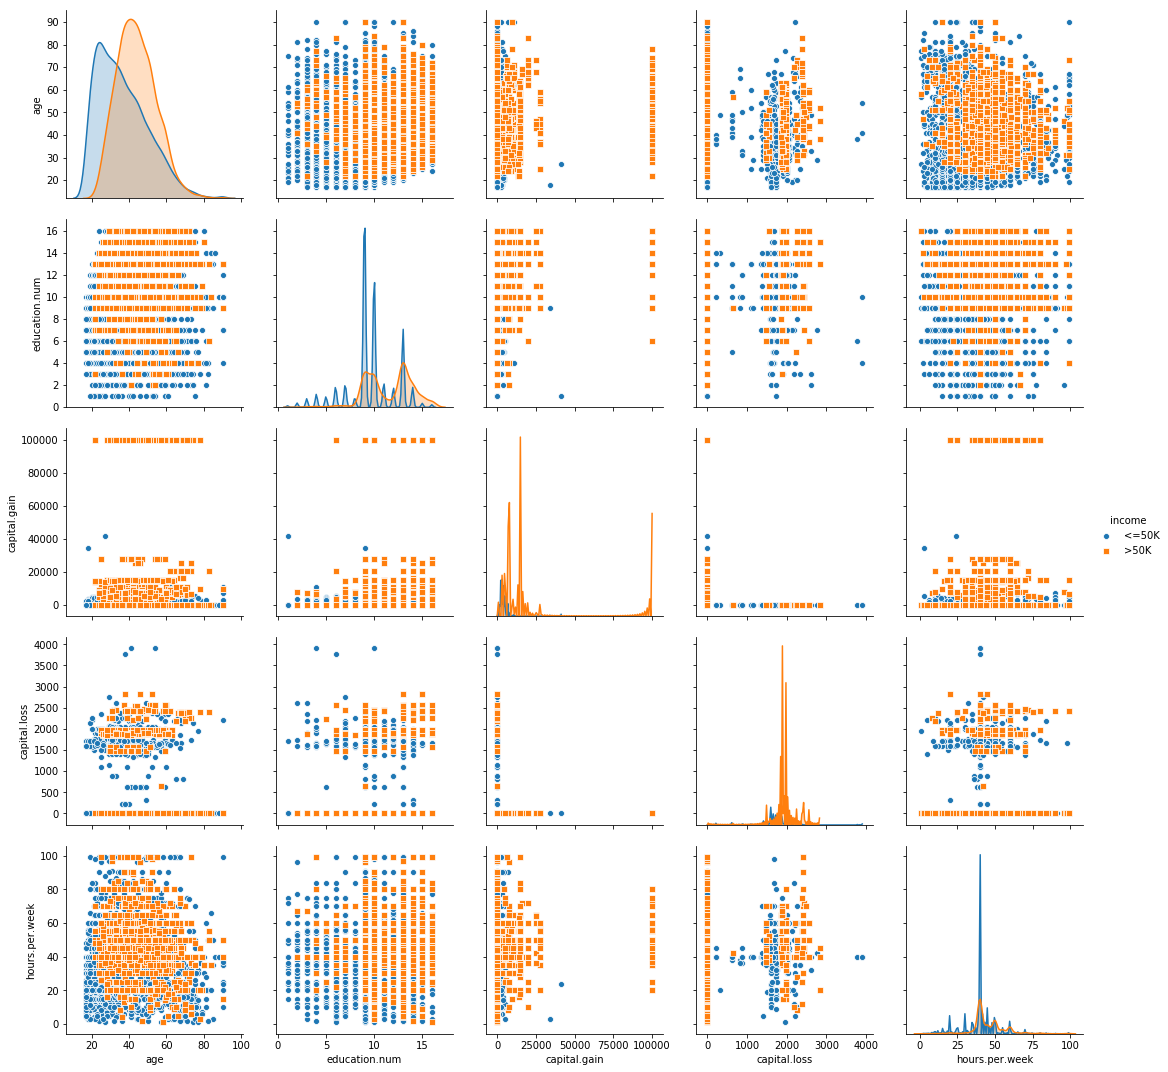

In [15]:
#plt.figure()
sns.pairplot(censusTrain.drop(["workclass","relationship","marital.status","occupation","race","sex"],axis=1), hue = "income", height=3, markers=["o", "s"])
#plt.show()

## Les k-plus proches voisins à partir des variables continues

La méthode des k-plus proches voisins suppose que les variables explicatives sont dans $\mathbb{R}^d$. Dans un premier temps on ne va donc garder que les variables numériques : education.num, age, hours.per.week, capital.gain, capital.loss. A chaque individu est donc associé un vecteur de $\mathbb{R}^5$. On va construire le classifieur des $k$-plus proches voisins $\hat{g}_n^k : \mathbb{R}^5 \rightarrow \{\leq 50K,>50K\}$.

A partir de la base de données, on créé d'abord la matrice des variables explicatives et le vecteur des labels associés pour la base d'apprentissage et la base de test. 

In [16]:
# extraction of the relevant columns

XTrain = censusTrain[["age","education.num","hours.per.week","capital.loss","capital.gain"]]
XTest = censusTest[["age","education.num","hours.per.week","capital.loss","capital.gain"]]

YTrain = censusTrain["income"]
YTest = censusTest["income"]

Ensuite, on créé un objet "clf" (pour classifieur) à l'aide du package scikitlearn. On l'entraîne (clf.fit), càd qu'il calcule l'estimateur des moindre carrés à partir de la base d'apprentissage, et on peut l'utiliser pour faire des prédictions (clf.predict). 

Cette manière de procéder est assez standard avec scikit-learn. 

In [17]:
from sklearn.neighbors import KNeighborsClassifier as KNN

k = 2

# create a classifier and fit it to the data
clfKNN = KNN(n_neighbors=k)
clfKNN.fit(XTrain,YTrain)

# predict the test set with it
YPred = clfKNN.predict(XTest)
# check the predictions for the training set
YPredTrain = clfKNN.predict(XTrain)

L'étape suivante consiste à évaluer la qualité du prédicteur sur la base de test, c'est-à-dire qu'il faut comparer les prédictions effectuées (YPred) avec les vrais labels. 

In [18]:
# compare them to the ground truth 
d = {'truth': YTrain, 'prediction': YPredTrain}
df = pd.DataFrame(data=d)
print(df)

# compute test error
TestError = np.mean(YTest!=YPred)
print("\n the test error is",TestError)

# compute training error
TrainError = np.mean(YTrain!=YPredTrain)
print("\n the train error is",TrainError)

# plot a confusion table 
Table = sklearn.metrics.confusion_matrix(YTest,YPred)
print("\n The confusion table is\n",Table)

       truth prediction
19648  <=50K      <=50K
1927   <=50K      <=50K
2015   <=50K      <=50K
18644  <=50K      <=50K
4680   <=50K      <=50K
1007    >50K       >50K
8439   <=50K      <=50K
362     >50K       >50K
3332   <=50K      <=50K
3128    >50K      <=50K
11894  <=50K      <=50K
14790   >50K      <=50K
11343  <=50K      <=50K
11901  <=50K      <=50K
14655  <=50K      <=50K
861     >50K      <=50K
9956   <=50K      <=50K
6113   <=50K      <=50K
1044    >50K       >50K
245     >50K       >50K
3252   <=50K      <=50K
18400  <=50K      <=50K
9252    >50K      <=50K
5603   <=50K      <=50K
619    <=50K      <=50K
18544  <=50K      <=50K
17127  <=50K      <=50K
12081   >50K      <=50K
16854  <=50K      <=50K
14648  <=50K      <=50K
...      ...        ...
17812  <=50K      <=50K
8191   <=50K      <=50K
16699  <=50K      <=50K
7734   <=50K      <=50K
9701   <=50K      <=50K
17433  <=50K      <=50K
16240  <=50K      <=50K
9404   <=50K      <=50K
7192   <=50K      <=50K
15940  <=50K    

On sélectionne maintenant à l'aide de l'approche par validation <b>la meilleure valeur de $k$ </b>.

In [19]:
Train, Valid = train_test_split(censusTrain, test_size=0.2)
print("la taille de la base d'apprentissage est",Train.shape)
print("la taille de la base de validation est",Valid.shape)

XXTrain = Train[["age","education.num","hours.per.week","capital.loss","capital.gain"]]
XXValid = Valid[["age","education.num","hours.per.week","capital.loss","capital.gain"]]

YYTrain = Train["income"]
YYValid = Valid["income"]

la taille de la base d'apprentissage est (12087, 12)
la taille de la base de validation est (3022, 12)


k is 1
k is 5
k is 9
k is 13
k is 17
k is 21
k is 25
k is 29
k is 34
k is 38
k is 42
k is 46
k is 50
k is 54
k is 58
k is 62
k is 67
k is 71
k is 75
k is 79
k is 83
k is 87
k is 91
k is 95
k is 100


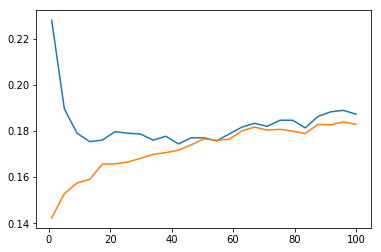

In [20]:
nb = 25
kValues = np.linspace(1,100,nb)
ValidError = np.zeros(nb)
TrainError = np.zeros(nb)

for i in range(nb):
    k = int(kValues[i])
    print("k is",k)
    clf = KNN(n_neighbors=k)
    clf.fit(XXTrain,YYTrain)
    PredValid = clf.predict(XXValid)
    ValidError[i] = np.mean(YYValid!=PredValid)
    PredTrain = clf.predict(XXTrain)
    TrainError[i] = np.mean(YYTrain!=PredTrain)
    
plt.plot(kValues,ValidError,label="validation error")
plt.plot(kValues,TrainError,label="training error")
    

## Régression linéaire

Dans la partie précédente, on a ignoré toutes les variables catégorielles, qui peuvent pourtant aussi aider à la prédiction. Comme les méthodes de régressions supposent aussi qu'à chaque individu est associé un vecteur dans $\mathbb{R}^d$ contenant les valeurs des variables explicatives, on va transformer la base de données pour que ça soit le cas. 

### Transformation des variables catégorielles 

On introduit des "dummy variables" pour représenter les variables explicatives catégorielles et on convertit la variable à prédire en une variable binaire à valeurs dans {0,1}. 


In [27]:
censusDataReal = pd.get_dummies(censusData,columns=['workclass','marital.status','occupation','relationship','race','sex'],drop_first=True)
censusDataReal.head(5)

,age,education.num,capital.gain,capital.loss,hours.per.week,income,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male
0,54,4,0,3900,40,<=50K,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
1,41,10,0,3900,40,<=50K,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
2,38,6,0,3770,40,<=50K,0,1,0,0,...,0,0,0,1,0,0,0,0,1,1
3,38,15,0,2824,45,>50K,0,0,0,1,...,1,0,0,0,0,0,0,0,1,1
4,52,13,0,2824,20,>50K,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0


In [28]:
from sklearn import preprocessing

# add a binary income variable to replace the categorial one
le = preprocessing.LabelEncoder()
censusDataReal["incomeB"] = le.fit_transform(censusDataReal["income"])
# remove the categorial variable
censusDataReal = censusDataReal.drop("income",axis=1)

In [29]:
censusDataReal["incomeB"].value_counts()

0    14144
1     4743
Name: incomeB, dtype: int64

In [30]:
print("size of the transformed data frame is",censusDataReal.shape)

size of the transformed data frame is (18887, 41)


### Création d'une nouvelle base de test et d'apprentissage

In [31]:
# split in train and test the continuous version of the database
censusTrainR, censusTestR = train_test_split(censusDataReal, test_size=0.2)
print(censusTrainR.shape)
print(censusTestR.shape)

# séparation des variables explicatives et de la variable à prédire

XTrainR = censusTrainR.drop("incomeB",axis=1)
XTestR = censusTestR.drop("incomeB",axis=1)

YTrainR = censusTrainR["incomeB"]
YTestR = censusTestR["incomeB"]

(15109, 41)
(3778, 41)


### Régression linéaire

Faisons d'abord une régression linéaire classique, sans régularisation 

In [32]:
from sklearn import linear_model

reg = linear_model.LinearRegression()
reg.fit(XTrainR,YTrainR)
print("\n coefficients are",reg.coef_)

print("\n predictions are ")
YPredR = reg.predict(XTestR)
print(YPredR)

print("\n they can be converted to predictions in {0,1}")
YPred = (reg.predict(XTestR)>0.5)*1
print(YPred)

# compare with ground truth
TestError = np.mean(YTestR!=YPred)
print("\n the test error is",TestError)

# plot a confusion table 
Table = sklearn.metrics.confusion_matrix(YTestR,YPred)
print("\n The confusion table is\n",Table)


 coefficients are [ 3.28120833e-03  2.91883075e-02  8.12277047e-06  8.58608780e-05
  2.96128821e-03 -1.17046638e-01 -9.11364831e-02 -4.92068265e-02
 -1.50521778e-01 -1.23211018e-01 -2.40251411e-01  1.59988728e-01
  9.15363057e-02  1.13389792e-02 -2.26213089e-03  1.48825554e-02
 -1.05893828e-03 -1.83947960e-01 -2.02301273e-02  1.38742090e-01
 -9.52723954e-02 -4.45440609e-02 -5.32310829e-02 -2.07183262e-02
  2.53754411e-02  1.10809751e-01  5.45610095e-02  4.10229016e-02
  7.79366611e-02 -2.93181269e-02 -1.95200575e-01 -1.60239547e-01
 -1.70003574e-01 -1.86438854e-01  1.09257667e-01  2.40354331e-02
  1.95563875e-02 -2.96498713e-02  3.80922547e-02  5.75185659e-02]

 predictions are 
[0.28925139 0.24171551 0.35967646 ... 0.12336365 0.4232612  0.55372692]

 they can be converted to predictions in {0,1}
[0 0 0 ... 0 0 1]

 the test error is 0.15960825833774483

 The confusion table is
 [[2612  200]
 [ 403  563]]


### Régression Ridge 

On peut maintenant ajouter une régularisation et voir à la main l'impact qu'elle a sur les prédictions. La fonction RidgeClassifier permet d'effectuer une régularisation L2. Notons qu'il permet de prédire directement des sorties binaires (la conversion précédente est faite automatiquement)

In [33]:
lamb = 0.05
clf = linear_model.RidgeClassifier(lamb,normalize=False)
clf.fit(XTrainR,YTrainR)

YPred = clf.predict(XTestR)

# compare with ground truth
TestError = np.mean(YTestR!=YPred)
print("\n the test error is",TestError)

# plot a confusion table 
Table = sklearn.metrics.confusion_matrix(YTestR,YPred)
print("\n The confusion table is\n",Table)



 the test error is 0.15960825833774483

 The confusion table is
 [[2612  200]
 [ 403  563]]


### LASSO (régularisation L1)

Pour la régression linéaire avec régularisation L1, on peut utiliser la fonction Lasso, qui construit le régresseur Lasso (il faut donc convertir les sorties en variables binaires). 

In [43]:
lamb = 1
reg = linear_model.Lasso(lamb,normalize=False)
reg.fit(XTrainR,YTrainR)

YPred = reg.predict(XTestR)

print("\n predictions are ")
YPredR = reg.predict(XTestR)
print(YPredR)

YPredBin = (YPred>0.5)*1

# compare with ground truth
TestError = np.mean(YTestR!=YPredBin)
print("\n the test error is",TestError)

# plot a confusion table 
Table = sklearn.metrics.confusion_matrix(YTestR,YPredBin)
print("\n The confusion table is\n",Table)




 predictions are 
[0.20851989 0.22989922 0.24096812 ... 0.24636682 0.23015671 0.49684834]

 the test error is 0.2331921651667549

 The confusion table is
 [[2793   19]
 [ 862  104]]


### Régression logistique

Le modèle génératif associé à cette méthode est plus adapté au caractère binaire de la variable à prédire, on peut donc se demander si elle va fonctionner mieux. 

L'implémentation de scikit-learn a par défaut une régularisation avec le paramètre C=1/lambda (d'où le choix de C très grand pour la version non régularisée). Notons qu'on peut également choisir une régularisation de type L1 ou L2. 

In [44]:
lamb = 0.1
clf = linear_model.LogisticRegression(penalty='l2',C=1/lamb)
clf.fit(XTrainR,YTrainR)

YPred = clf.predict(XTestR)

# compare with ground truth
TestError = np.mean(YTestR!=YPred)
print("\n the test error is",TestError)

# plot a confusion table 
Table = sklearn.metrics.confusion_matrix(YTestR,YPred)
print("\n The confusion table is\n",Table)


 the test error is 0.14928533615669667

 The confusion table is
 [[2592  220]
 [ 344  622]]


Plutôt que sélectionner le paramètre (et le type de régularisation) à la main via une approche par validation, on peut utiliser l'approche par validation croisée, pour laquelle scikit-learn propose une implémentation directement (et ce pour beaucoup de méthodes d'apprentissage).

In [45]:
clf_cv = linear_model.LogisticRegressionCV(Cs=20,cv=10,penalty='l2')
clf_cv.fit(XTrainR,YTrainR)

YPredCV = clf_cv.predict(XTestR)

# compare with ground truth
TestError = np.mean(YTestR!=YPredCV)
print("\n the test error is",TestError)

# plot a confusion table 
Table = sklearn.metrics.confusion_matrix(YTestR,YPredCV)
print("\n The confusion table is\n",Table)


 the test error is 0.14743250397035468

 The confusion table is
 [[2606  206]
 [ 351  615]]


In [46]:
# print details 
print("the values of lambda tried are",1/clf_cv.Cs_)
print("\n the best value of lambda is",1/clf_cv.C_)


the values of lambda tried are [1.00000000e+04 3.79269019e+03 1.43844989e+03 5.45559478e+02
 2.06913808e+02 7.84759970e+01 2.97635144e+01 1.12883789e+01
 4.28133240e+00 1.62377674e+00 6.15848211e-01 2.33572147e-01
 8.85866790e-02 3.35981829e-02 1.27427499e-02 4.83293024e-03
 1.83298071e-03 6.95192796e-04 2.63665090e-04 1.00000000e-04]

 the best value of lambda is [0.61584821]


## Arbres de décision 

On va construire un arbre de décision complet et s'en servir pour la prédiction. En principe les arbres de décision peuvent utiliser directement les variables catégorielles, mais ce n'est pas le cas de l'implémentation de scikit-learn. On va donc aussi utiliser la base de données transformée ne comprenant que des variables continues.

In [47]:
censusTrainD, censusTestD = train_test_split(censusDataReal, test_size=0.2)
print(censusTrainD.shape)
print(censusTestD.shape)

(15109, 41)
(3778, 41)


In [72]:
from sklearn.tree import DecisionTreeClassifier as CART

# this time, take ALL the features, categorial or not 
XTrainD = censusTrainD.drop("incomeB",axis=1)
XTestD = censusTestD.drop("incomeB",axis=1)
YTrainD = censusTrainD["incomeB"]
YTestD = censusTestD["incomeB"]

# define a new classifier 
clf = CART(criterion="entropy",max_depth=15,min_samples_leaf=8,min_impurity_decrease=0.005)
clf.fit(XTrainD,YTrainD)

# predict the test samples with it
YPred = clf.predict(XTestD)

# compare with ground truth
TestError = np.mean(YTestD!=YPred)
print("the test error is",TestError)

# plot a confusion table 
Table = sklearn.metrics.confusion_matrix(YTestD,YPred)
print("The confusion table is\n",Table)

the test error is 0.17072525145579673
The confusion table is
 [[2638  164]
 [ 481  495]]


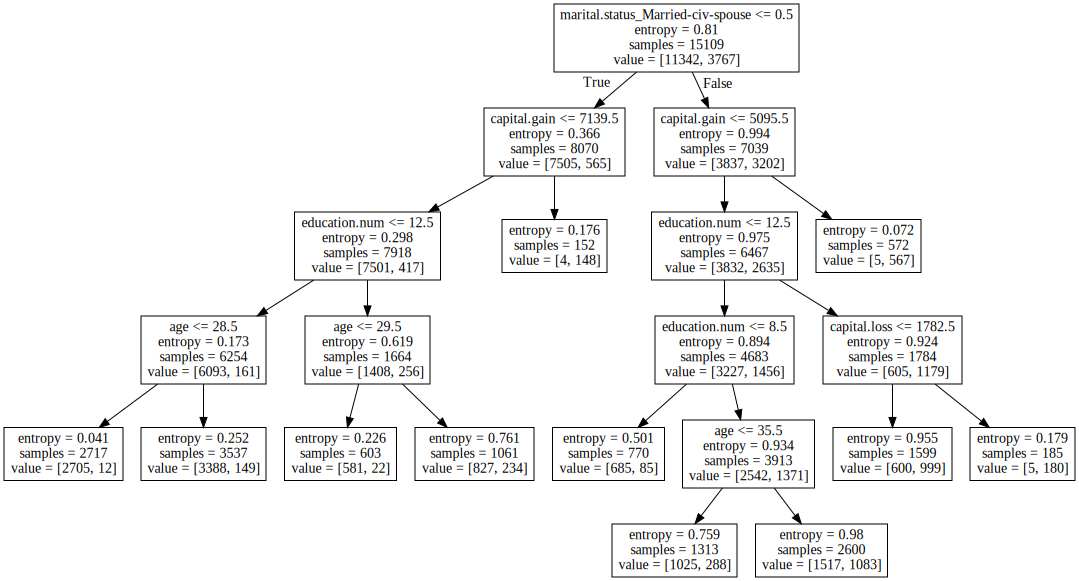

In [73]:
# visualizing the graph : graphviz has to be installed on the system (apt-get) not only through pip3
import graphviz 
from sklearn import tree

dot_data = tree.export_graphviz(clf, out_file=None,feature_names=XTrainD.columns.values.tolist()) 
graph = graphviz.Source(dot_data)  
graph